In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fftpack
%matplotlib inline

In [2]:
# Number of samplepoints
N = 800
# sample spacing
T = 1.0 / N

x = np.linspace(0.0, N*T, N)

In [3]:
def plot_fft(y):
    yf = fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))

In [4]:
def plot(y):
    x = np.linspace(0.0, N*T, N)
    plt.plot(x, y)

In [5]:
def plot_both(y):
    fig, axes = plt.subplots(2, figsize=(12, 8))
    
    x = np.linspace(0.0, N*T, N)
    axes[0].plot(x, y)
    
    yf = fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
    axes[1].plot(xf, 2.0/N * np.abs(yf[:N//2]))

In [6]:
def low_pass_filter(y):
    return y[2:] + y[:-2]

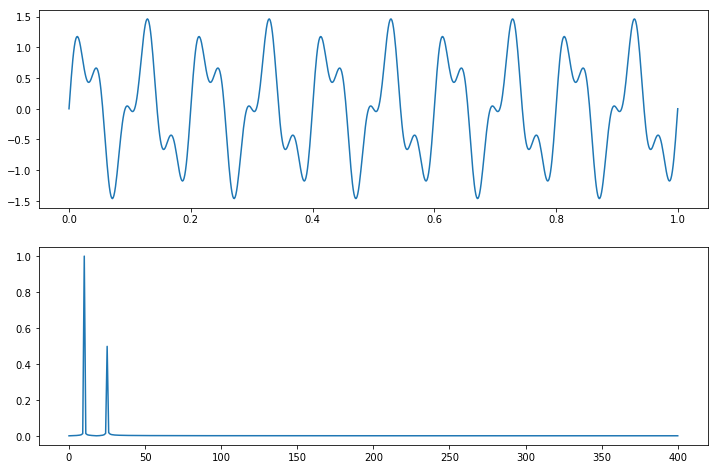

In [11]:
x = np.linspace(0.0, N*T, N)
y = np.sin(10.0 * 2.0*np.pi*x) + 0.5*np.sin(25.0 * 2.0*np.pi*x)
plot_both(y)

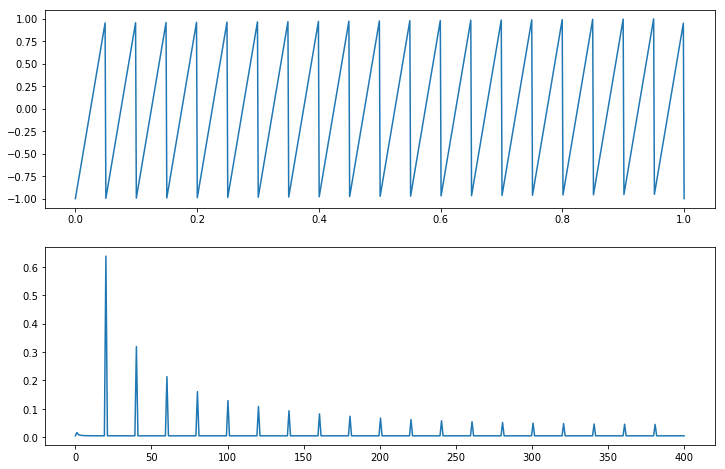

In [8]:
x = np.linspace(0.0, N*T, N)
y = signal.sawtooth(20.0 * 2.0*np.pi*x)
plot_both(y)

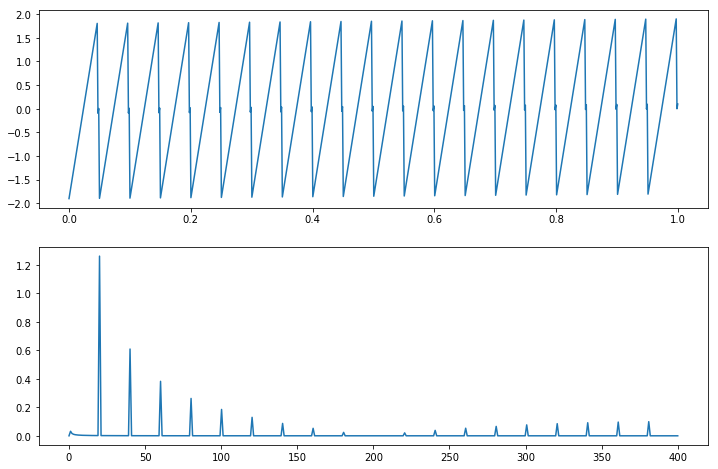

In [9]:
x = np.linspace(0.0, (N+2)*T, N+2)
y = low_pass_filter(signal.sawtooth(20.0 * 2.0*np.pi*x))
plot_both(y)

In [10]:
def max_amplitude(freq):
    x = np.linspace(0.0, (N+1)*T, N+1)
    y = np.exp(freq*2.0*np.pi*1j*x)
    return np.absolute(low_pass_filter(y)).max()

def angle(freq):
    x = np.linspace(0.0, (N+1)*T, N+1)
    y = np.exp(freq*2.0*np.pi*1j*x)
    return np.mean(np.angle(y[:-1]*np.conj(low_pass_filter(y))))/(2.0*np.pi)

freqs = range(1, 400)
ampout = [max_amplitude(f) for f in freqs]
angles = [angle(f) for f in freqs]
fig, axes = plt.subplots(2, figsize=(12, 8))
axes[0].plot(freqs, ampout)
axes[1].plot(freqs, angles)

ValueError: operands could not be broadcast together with shapes (800,) (799,) 